## Stores Sales Prediction



#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### Problem statement
- Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

### Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
print(sklearn.__version__)

1.3.0


#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('Train.csv')

#### Show Top 5 Records

In [4]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Shape of the dataset

In [5]:
df.shape

(8523, 12)

### Dataset information

- Item_Identifier: Unique product ID  
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [6]:
df['Item_Visibility'] = df['Item_Visibility']*100

In [7]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,1.274109,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,12.746986,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,1.668711,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,9.444959,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

Check Missing values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Item_Weight 0.1717  % missing values
Outlet_Size 0.2828  % missing values


 
#### Since there are two missing values, we need to find the relationship between missing values and Item_Outlet_Sales               
#### Let's plot some diagram for this relationship

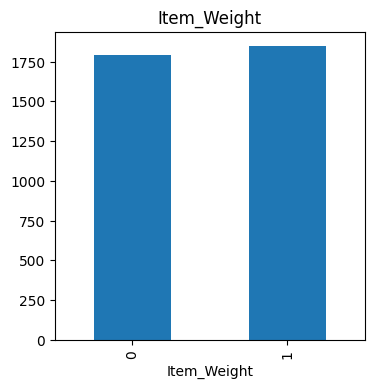

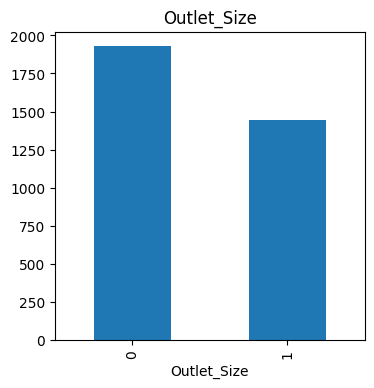

In [10]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean 'Item_Outlet_Sales' where the information is missing or present
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar(figsize=(4, 4))
    plt.title(feature)
    plt.show()
    

### Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values.

### Handling numerical variables that contains missing values

In [11]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling Categorical variable that contains missing values

In [13]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,1.927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,1.676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 3.2 Check Duplicates

In [19]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [20]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 3.4 Checking the number of unique values of each column

In [21]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [22]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [23]:

continuous_feature=[feature for feature in df.columns if df[feature].dtypes != 'O' and df[feature].dtypes != 'int64']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [24]:
df[continuous_feature]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,1.604730,249.8092,3735.1380
1,5.920,1.927822,48.2692,443.4228
2,17.500,1.676007,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,5.678339,214.5218,2778.3834
8519,8.380,4.698243,108.1570,549.2850
8520,10.600,3.518627,85.1224,1193.1136
8521,7.210,14.522065,103.1332,1845.5976


<Axes: >

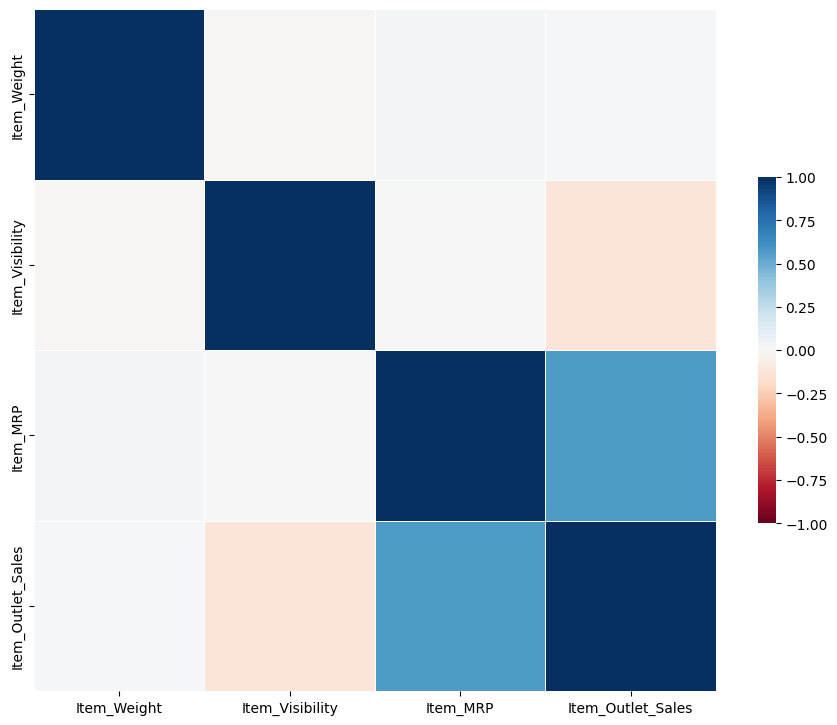

In [25]:
import seaborn as sns
corr = df[continuous_feature].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
df1 = df[continuous_feature]

In [27]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,1.604730,249.8092,3735.1380
1,5.920,1.927822,48.2692,443.4228
2,17.500,1.676007,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,5.678339,214.5218,2778.3834
8519,8.380,4.698243,108.1570,549.2850
8520,10.600,3.518627,85.1224,1193.1136
8521,7.210,14.522065,103.1332,1845.5976


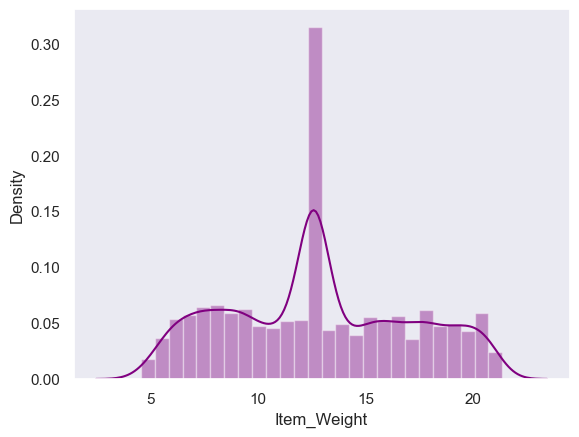

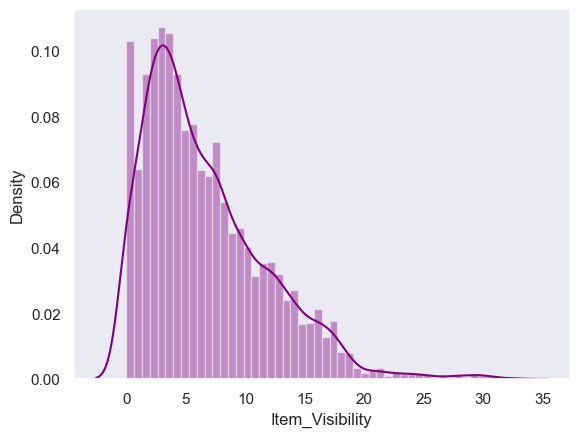

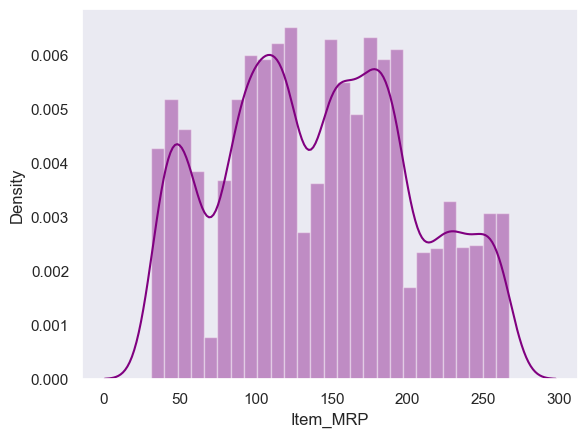

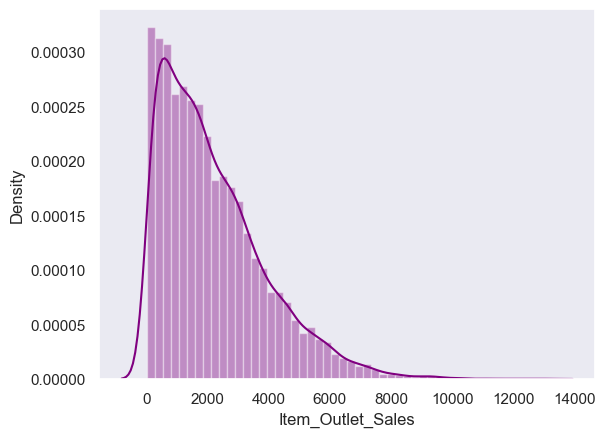

In [28]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in df1:
    sns.set(style='dark',)
    data=df1.copy()
    sns.distplot(data[feature], color='purple')
    plt.show()


### Outliers

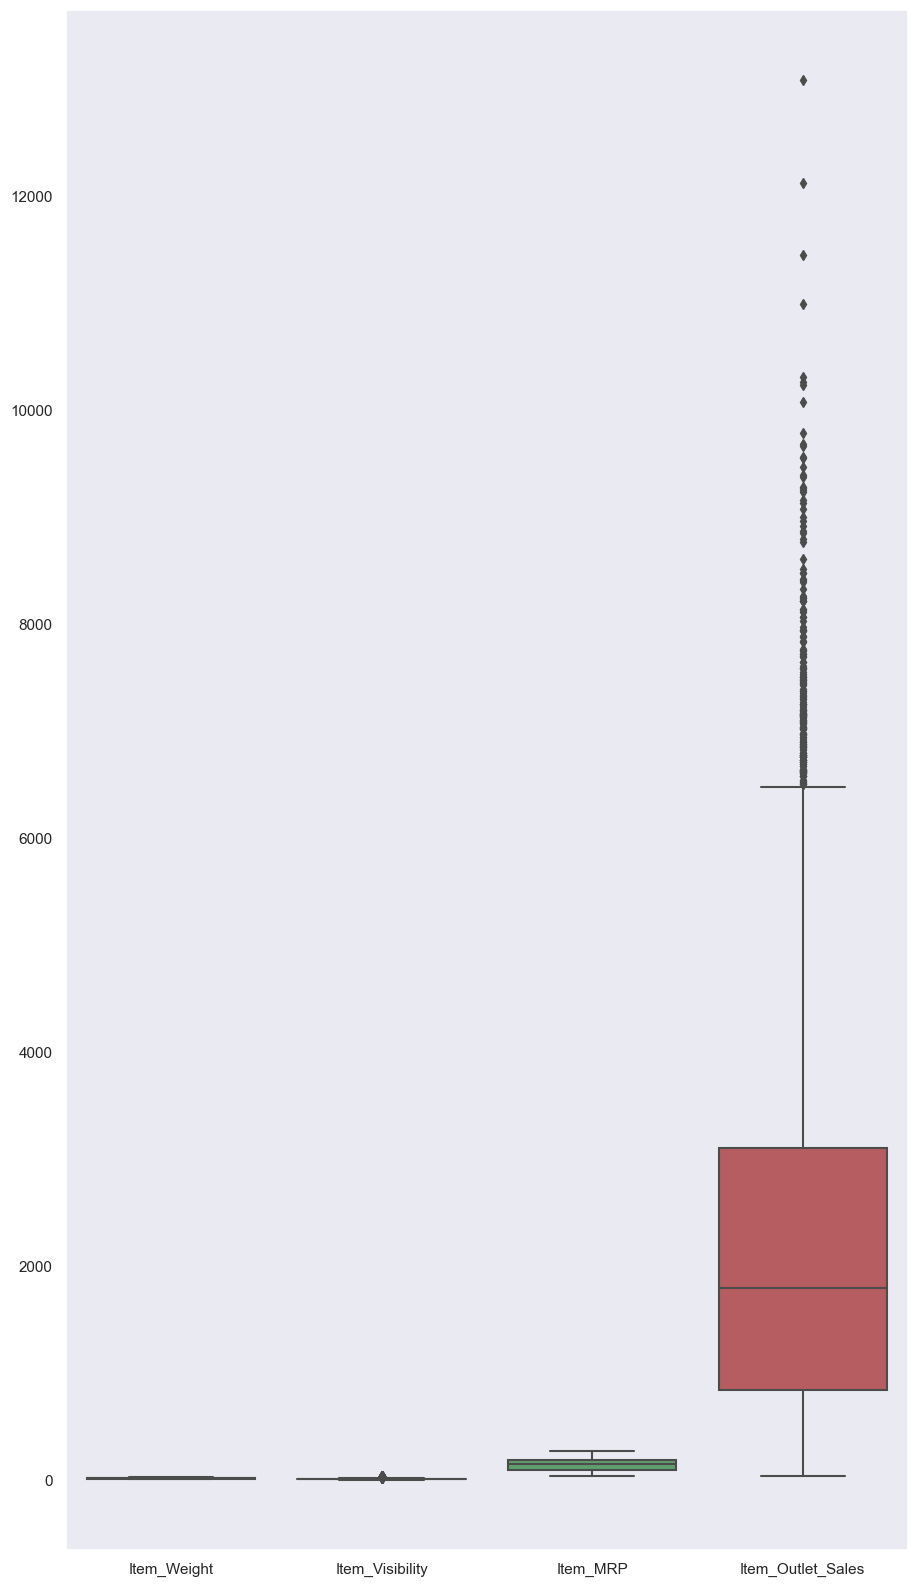

In [29]:
plt.subplots(1,figsize=(50,20))
plt.subplot(141)
sns.boxplot(df1)
plt.show()

In [30]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df1)

PowerTransformer()

In [31]:
df_scaled = pt.fit_transform(df1)

In [32]:
df_numerical = pd.DataFrame(df_scaled)

In [33]:
df_numerical

,0,1,2,3
0,-0.808889,-1.096267,1.623670,0.985078
1,-1.738575,-0.968790,-1.595016,-1.218135
2,1.094638,-1.067205,0.081237,0.220360
3,1.449766,-1.996676,0.689968,-0.835183
4,-0.905013,-1.996676,-1.476078,-0.566616
...,...,...,...,...
8518,-1.465689,0.059306,1.148258,0.573946
8519,-1.050160,-0.157468,-0.463127,-1.062855
8520,-0.479968,-0.457417,-0.867930,-0.393044
8521,-1.368854,1.387998,-0.548996,0.070669


In [34]:
df_numerical = df_numerical.rename(columns={0: 'Item_Weight'})
df_numerical = df_numerical.rename(columns={1: 'Item_Visibility'})
df_numerical = df_numerical.rename(columns={2: 'Item_MRP'})
df_numerical = df_numerical.rename(columns={3: 'Item_Outlet_Sales'})



In [35]:
df_numerical

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.808889,-1.096267,1.623670,0.985078
1,-1.738575,-0.968790,-1.595016,-1.218135
2,1.094638,-1.067205,0.081237,0.220360
3,1.449766,-1.996676,0.689968,-0.835183
4,-0.905013,-1.996676,-1.476078,-0.566616
...,...,...,...,...
8518,-1.465689,0.059306,1.148258,0.573946
8519,-1.050160,-0.157468,-0.463127,-1.062855
8520,-0.479968,-0.457417,-0.867930,-0.393044
8521,-1.368854,1.387998,-0.548996,0.070669


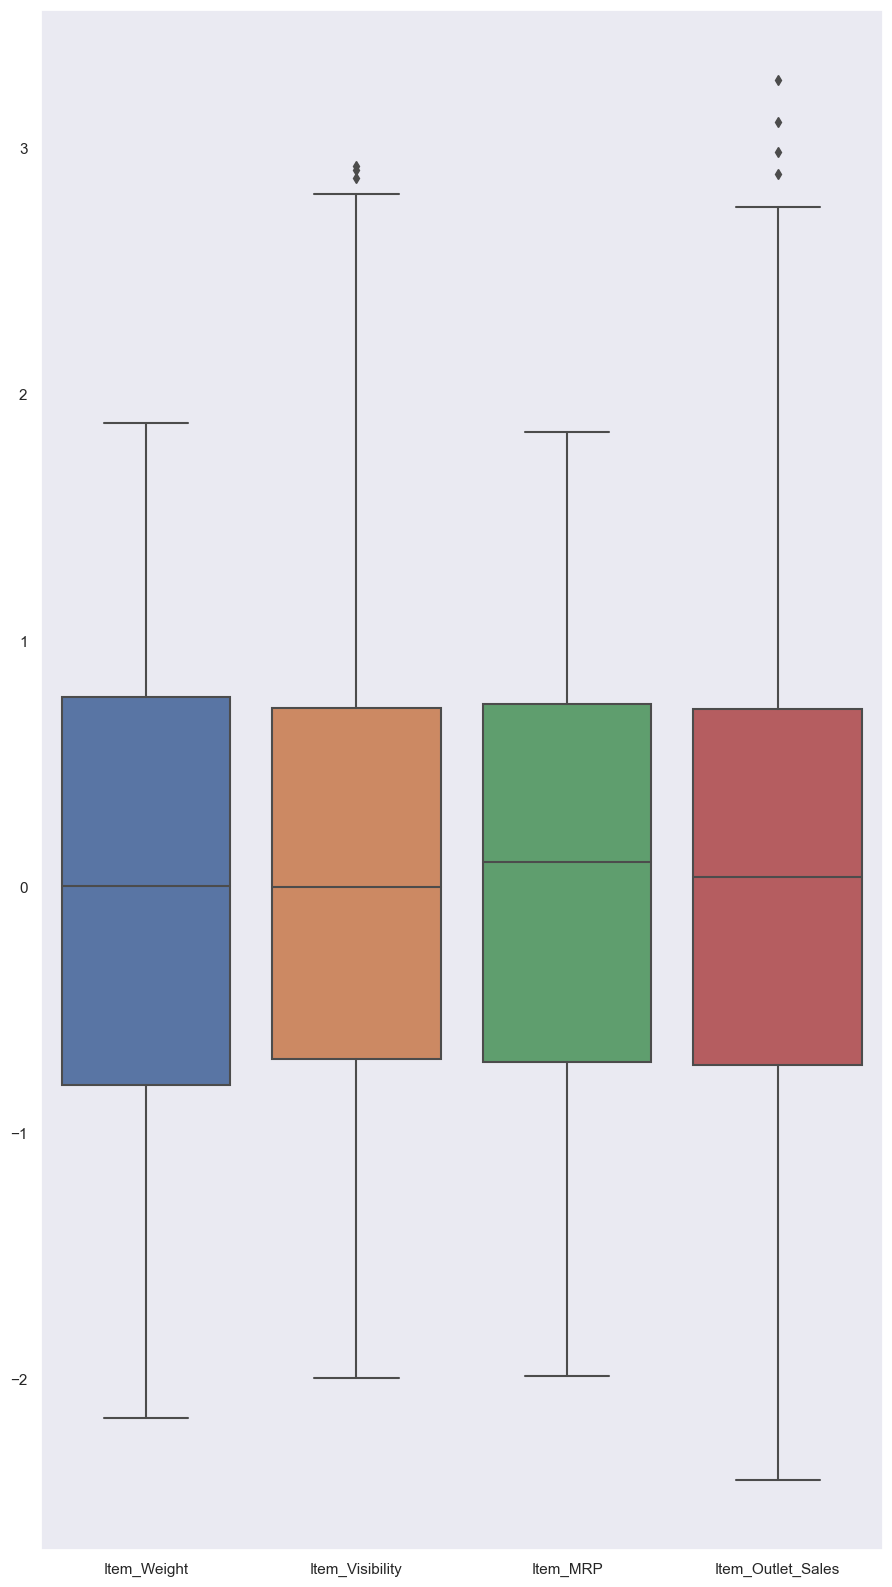

In [36]:
plt.subplots(1,figsize=(50,20))
plt.subplot(141)
sns.boxplot(df_numerical)
plt.show()

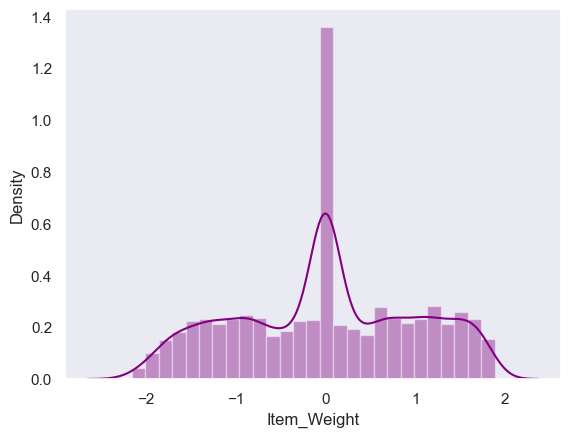

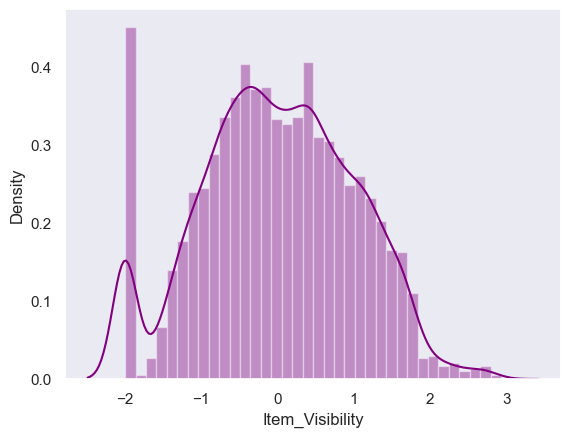

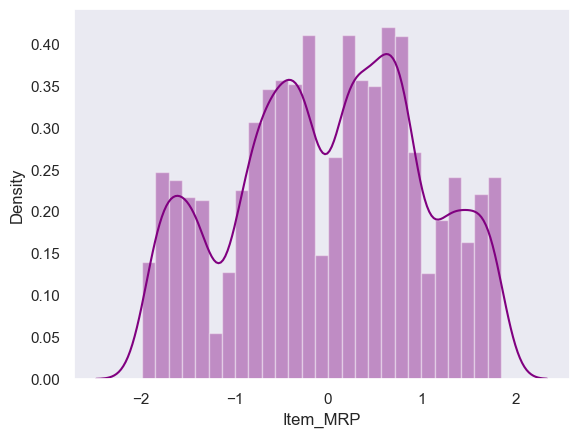

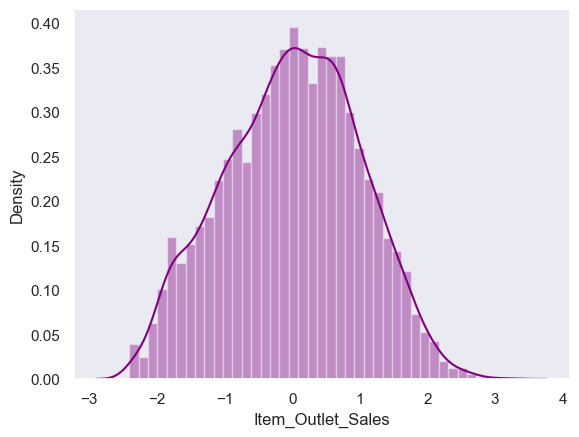

In [37]:
## Lets analyse the continuous values by creating histograms to understand the distribution

import matplotlib.pyplot as plt

for feature in df_numerical:
    sns.set(style='dark',)
    data=df_numerical.copy()
    sns.distplot(data[feature], color='purple')
    plt.show()

In [38]:
df_numerical['Item_Visibility'].describe()


count    8.523000e+03
mean    -1.392240e-16
std      1.000059e+00
min     -1.996676e+00
25%     -7.010298e-01
50%     -1.279189e-03
75%      7.267828e-01
max      2.928955e+00
Name: Item_Visibility, dtype: float64

In [39]:
IQR=df_numerical.Item_Visibility.quantile(0.75)-df_numerical.Item_Visibility.quantile(0.25)
lower_bridge=df_numerical['Item_Visibility'].quantile(0.25)-(IQR*1.5)
upper_bridge=df_numerical['Item_Visibility'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


-2.8427486590224156
2.868501706131851


(None, None)

In [40]:
df_numerical.loc[df_numerical["Item_Visibility"]>=2.868501706131851,'Item_Visibility']=2.868501706131851


In [41]:
df_numerical['Item_Outlet_Sales'].describe()


count    8.523000e+03
mean    -4.218405e-16
std      1.000059e+00
min     -2.408180e+00
25%     -7.244115e-01
50%      3.856267e-02
75%      7.218153e-01
max      3.279477e+00
Name: Item_Outlet_Sales, dtype: float64

In [42]:
IQR=df_numerical.Item_Outlet_Sales.quantile(0.75)-df_numerical.Item_Outlet_Sales.quantile(0.25)
lower_bridge=df_numerical['Item_Outlet_Sales'].quantile(0.25)-(IQR*1.5)
upper_bridge=df_numerical['Item_Outlet_Sales'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)


-2.8937515790679202
2.8911553859692174


(None, None)

In [43]:
df_numerical.loc[df_numerical["Item_Outlet_Sales"]>=2.8911553859692174,'Item_Outlet_Sales']=2.8911553859692174


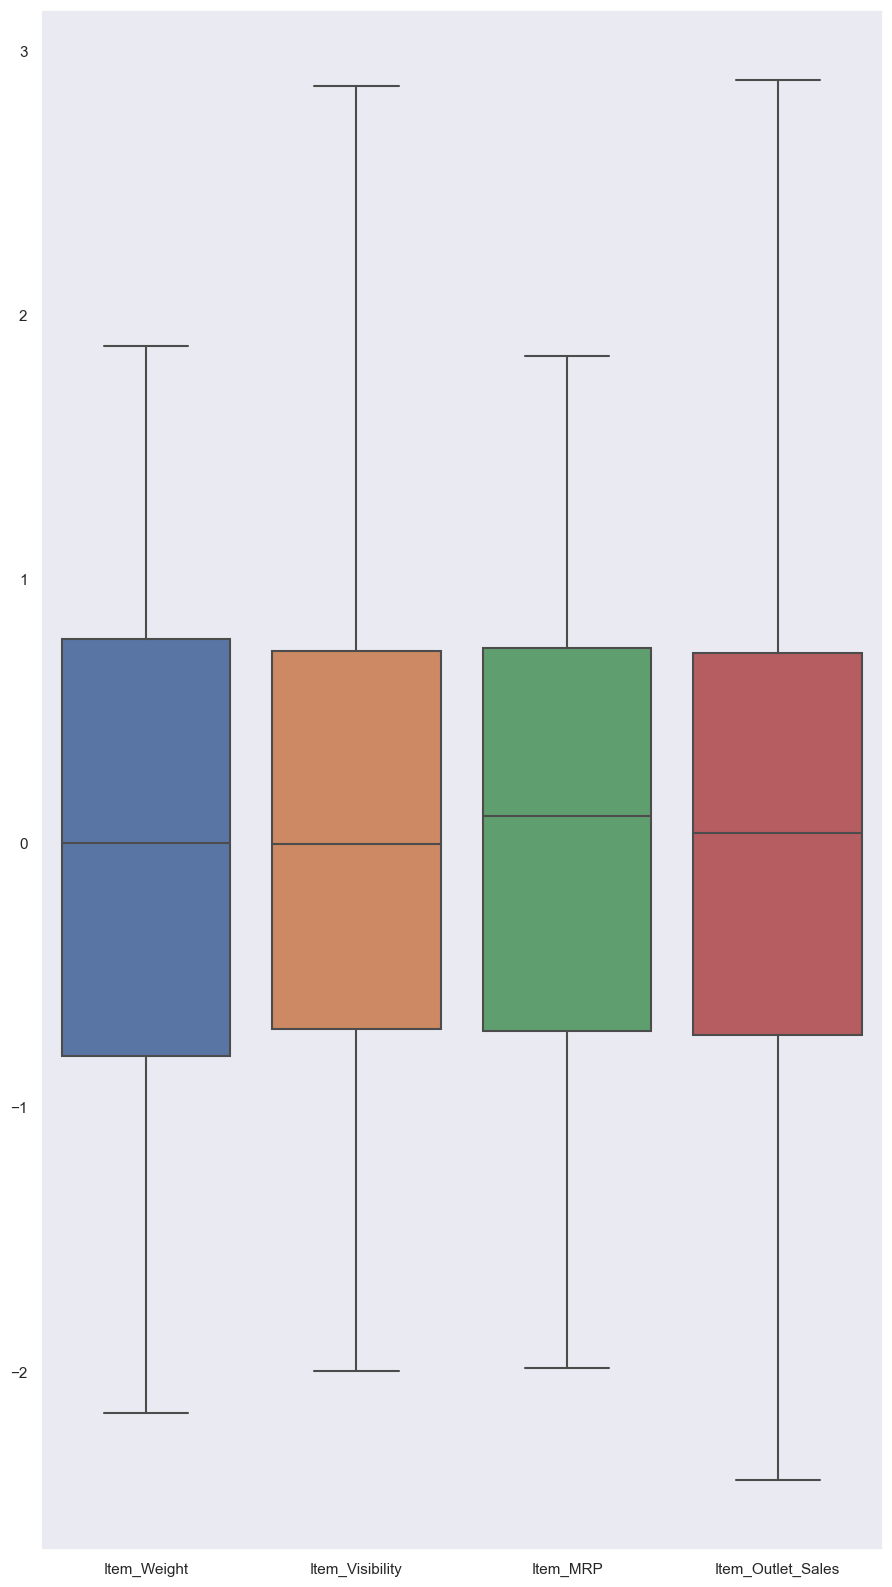

In [44]:
plt.subplots(1,figsize=(50,20))
plt.subplot(141)
sns.boxplot(df_numerical)
plt.show()

## Find out the relationship between categorical variable and dependent feature Item_Outlet_Sales

In [45]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print("categorical feature Count {}".format(len(categorical_features)))


categorical feature Count 7


In [46]:
categorical_features



['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [62]:
print("Categories in 'Item_Fat_Content' variable:",end=" " )
print(df['Item_Fat_Content'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Item_Type' variable:",end=" ")
print(df['Item_Type'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in'Outlet_Size' variable:",end=" " )
print(df['Outlet_Size'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Outlet_Location_Type' variable:",end=" " )
print(df['Outlet_Location_Type'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Outlet_Type' variable:",end=" " )
print(df['Outlet_Type'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Outlet_Identifier' variable:",end=" " )
print(df['Outlet_Identifier'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Outlet_Type' variable:",end=" " )
print(df['Outlet_Type'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Outlet_Type' variable:",end=" " )
print(df['Outlet_Type'].unique())

print('--------------------------------------------------------------------------------------------------------------------')

print("Categories in 'Outlet_Establishment_Year' variable:",end=" " )
print(df['Outlet_Establishment_Year'].unique())



Categories in 'Item_Fat_Content' variable: ['Low Fat' 'Regular']
--------------------------------------------------------------------------------------------------------------------
Categories in 'Item_Type' variable: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
--------------------------------------------------------------------------------------------------------------------
Categories in'Outlet_Size' variable: ['Medium' 'High' 'Small']
--------------------------------------------------------------------------------------------------------------------
Categories in 'Outlet_Location_Type' variable: ['Tier 1' 'Tier 3' 'Tier 2']
--------------------------------------------------------------------------------------------------------------------
Categories in 'Outlet_Type' variable: ['Supermarket Type1' 'Supermarket Type2'

In [63]:
"""df = df.replace('low fat', 'Low Fat')
df = df.replace('LF', 'Low Fat')
df = df.replace('reg', 'Regular')"""

df['Item_Fat_Content'] = df['Item_Fat_Content'].map({"Low Fat" : 'Low Fat' , "LF" : "Low Fat" , 'low fat' : "Low Fat" , "Regular" : "Regular" , "reg" : "Regular" })


In [64]:
print("Categories in 'Item_Fat_Content' variable:",end=" " )
print(df['Item_Fat_Content'].unique())

Categories in 'Item_Fat_Content' variable: ['Low Fat' 'Regular']


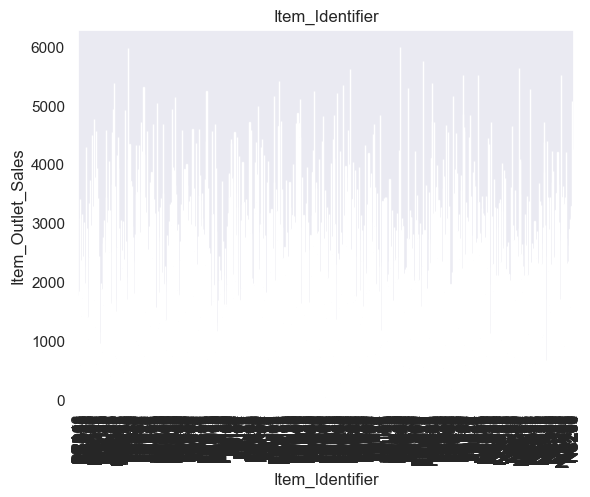

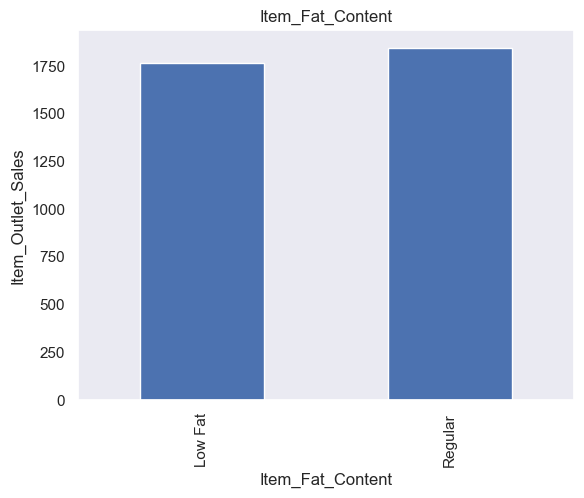

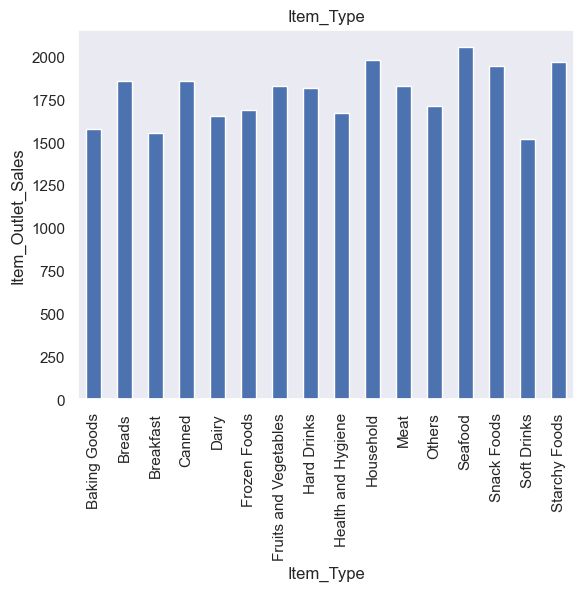

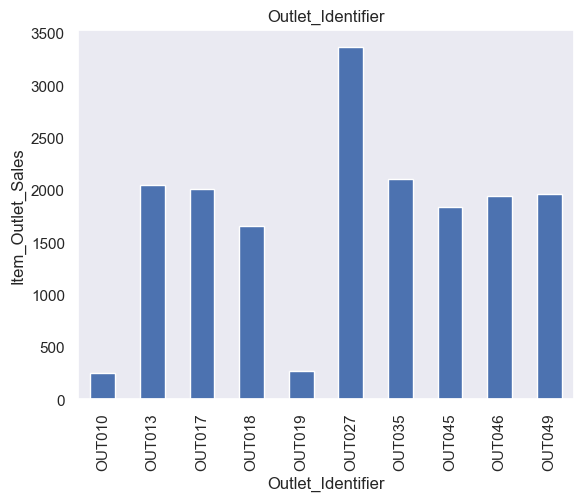

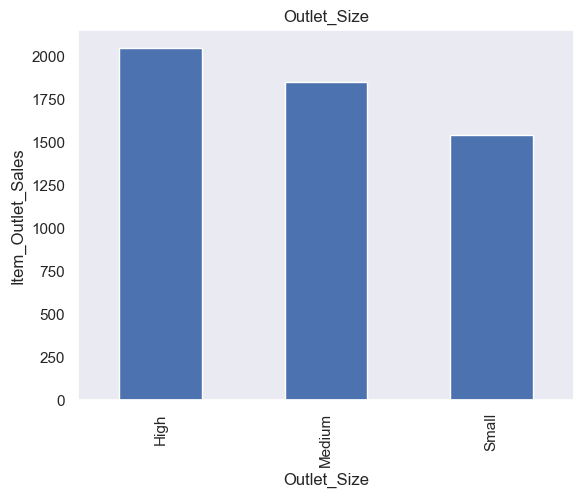

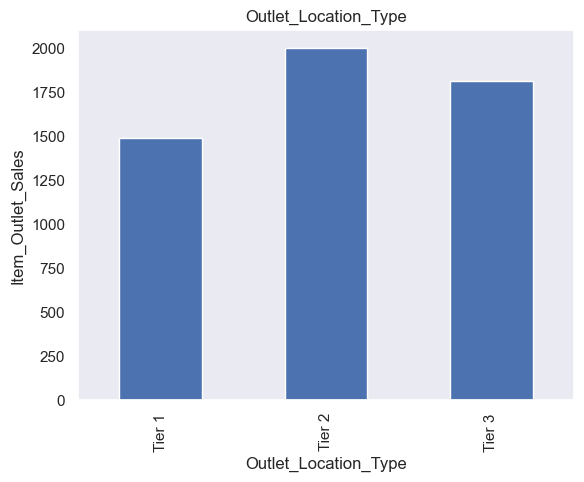

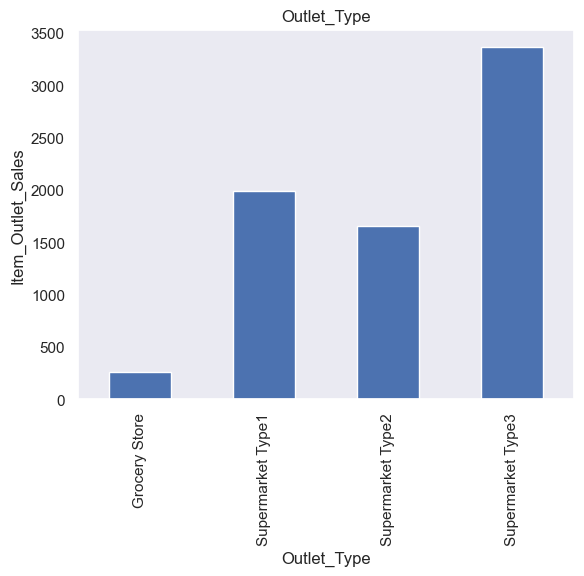

In [49]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.title(feature)
    plt.show()

    

## There is no relationship between the Item_Identifier and  Item_Outlet_Sales. So dropping the feature


In [50]:

df2 = df[[ 'Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

## Onehotencoding with many categories in a feature


In [51]:
df2.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [52]:
df_one_hot = df2.drop(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type'], axis = 1)


In [53]:
df_one_hot

,Item_Type,Outlet_Identifier,Outlet_Type
0,Dairy,OUT049,Supermarket Type1
1,Soft Drinks,OUT018,Supermarket Type2
2,Meat,OUT049,Supermarket Type1
3,Fruits and Vegetables,OUT010,Grocery Store
4,Household,OUT013,Supermarket Type1
...,...,...,...
8518,Snack Foods,OUT013,Supermarket Type1
8519,Baking Goods,OUT045,Supermarket Type1
8520,Health and Hygiene,OUT035,Supermarket Type1
8521,Snack Foods,OUT018,Supermarket Type2


In [54]:
for i in df_one_hot.columns:
    print(i, ': ',len(df_one_hot[i].unique()),'labels')

Item_Type :  16 labels
Outlet_Identifier :  10 labels
Outlet_Type :  4 labels


In [58]:
from sklearn.preprocessing import OneHotEncoder
Item_Type_categories = ['Dairy','Soft Drinks','Meat','Fruits and Vegetables','Household']
Outlet_Identifier_categories = ['OUT049','OUT018','OUT010','OUT013','OUT027','OUT045','OUT017','OUT046','OUT035','OUT019']
Outlet_Type_categories = ['Supermarket Type1','Supermarket Type2','Grocery Store','Supermarket Type3']

df_onehot = OneHotEncoder(categories=[Item_Type_categories, Outlet_Identifier_categories, Outlet_Type_categories], drop="first",sparse_output =False)



In [59]:
df_onehot

OneHotEncoder(categories=[['Dairy', 'Soft Drinks', 'Meat',
                           'Fruits and Vegetables', 'Household'],
                          ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027',
                           'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019'],
                          ['Supermarket Type1', 'Supermarket Type2',
                           'Grocery Store', 'Supermarket Type3']],
              drop='first', sparse_output=False)

In [61]:
df_onehot.fit_transform(df_one_hot)

ValueError: Found unknown categories ['Seafood', 'Starchy Foods', 'Canned', 'Breads', 'Snack Foods', 'Breakfast', 'Health and Hygiene', 'Baking Goods', 'Hard Drinks', 'Others', 'Frozen Foods'] in column 0 during fit

In [62]:


# Create a one-hot encoded version of the DataFrame
df_onehot = pd.get_dummies(df_one_hot, columns=["Item_Type","Outlet_Identifier","Outlet_Type"])

# Print the one-hot encoded DataFrame
print(df_onehot)


      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                      False             False                False   
1                      False             False                False   
2                      False             False                False   
3                      False             False                False   
4                      False             False                False   
...                      ...               ...                  ...   
8518                   False             False                False   
8519                    True             False                False   
8520                   False             False                False   
8521                   False             False                False   
8522                   False             False                False   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                False             True                   False   
1            

In [63]:
df_onehot

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8519,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
8520,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
8521,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [64]:
column_names = df_onehot.columns

# Print the column names
print(column_names)

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')


### Removing one column of one-hot encoded categorical variable to prevent dummy variable trap

In [65]:

df_one_hot_final = df_onehot.drop(columns=['Item_Type_Starchy Foods','Outlet_Identifier_OUT049','Outlet_Type_Supermarket Type3'], axis = 1)



In [66]:
df_one_hot_final.columns

Index(['Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2'],
      dtype='object')

In [67]:
df_one_hot_final

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8519,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
8520,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
8521,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [68]:
df_one_hot_final = df_one_hot_final.replace(True, 1)
df_one_hot_final = df_one_hot_final.replace(False, 0)


In [69]:
df_one_hot_final

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### Ordinal encoding 

In [70]:
df3 = df2.copy()

In [71]:
df3

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [72]:
df_ordinal = df3.drop(columns=['Item_Type','Outlet_Identifier','Outlet_Type'], axis = 1)


In [73]:
df_ordinal

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type
0,Low Fat,Medium,Tier 1
1,Regular,Medium,Tier 3
2,Low Fat,Medium,Tier 1
3,Regular,Medium,Tier 3
4,Low Fat,High,Tier 3
...,...,...,...
8518,Low Fat,High,Tier 3
8519,Regular,Medium,Tier 2
8520,Low Fat,Small,Tier 2
8521,Regular,Medium,Tier 3


In [74]:
dictionary_1={'Low Fat':1,'Regular':2}

dictionary_2={'Small':1,'Medium':2, 'High':3}

dictionary_3={'Tier 3':1,'Tier 2':2, 'Tier 1':3}

In [75]:
df_ordinal['Item_Fat_Content']=df_ordinal['Item_Fat_Content'].map(dictionary_1)


In [76]:
df_ordinal['Outlet_Size']=df_ordinal['Outlet_Size'].map(dictionary_2)


In [77]:
df_ordinal['Outlet_Location_Type']=df_ordinal['Outlet_Location_Type'].map(dictionary_3)


In [78]:
df_ordinal

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type
0,1,2,3
1,2,2,1
2,1,2,3
3,2,2,1
4,1,3,1
...,...,...,...
8518,1,3,1
8519,2,2,2
8520,1,1,2
8521,2,2,1


In [79]:
df_ordinal.describe()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type
count,8523.000000,8523.000000,8523.000000
mean,1.352693,1.829168,1.887129
std,0.477836,0.600327,0.812757
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000
75%,2.000000,2.000000,3.000000
max,2.000000,3.000000,3.000000


### Min Max Scaler responds well if the standard deviation is small and when a distribution is not Gaussian.

In [80]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [81]:
df[['Outlet_Establishment_Year']]

,Outlet_Establishment_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


In [82]:
df_minmax = pd.concat([df_ordinal,df[['Outlet_Establishment_Year']]], axis=1, join='inner')

In [83]:
df_minmax

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year
0,1,2,3,1999
1,2,2,1,2009
2,1,2,3,1999
3,2,2,1,1998
4,1,3,1,1987
...,...,...,...,...
8518,1,3,1,1987
8519,2,2,2,2002
8520,1,1,2,2004
8521,2,2,1,2009


In [84]:
from sklearn.preprocessing import MinMaxScaler
pt = MinMaxScaler()

In [85]:
pt.fit(df_minmax)

MinMaxScaler()

In [86]:
df_scaled_1 = pt.fit_transform(df_minmax)

In [87]:
df_ordinal_final = pd.DataFrame(df_scaled_1)

In [88]:
df_ordinal_final

,0,1,2,3
0,0.0,0.5,1.0,0.583333
1,1.0,0.5,0.0,1.000000
2,0.0,0.5,1.0,0.583333
3,1.0,0.5,0.0,0.541667
4,0.0,1.0,0.0,0.083333
...,...,...,...,...
8518,0.0,1.0,0.0,0.083333
8519,1.0,0.5,0.5,0.708333
8520,0.0,0.0,0.5,0.791667
8521,1.0,0.5,0.0,1.000000


In [89]:
df_ordinal_final = df_ordinal_final.rename(columns={0: 'Item_Fat_Content',1: 'Outlet_Size',2: 'Outlet_Location_Type',3:'Outlet_Establishment_Year'})



In [90]:
df_ordinal_final

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year
0,0.0,0.5,1.0,0.583333
1,1.0,0.5,0.0,1.000000
2,0.0,0.5,1.0,0.583333
3,1.0,0.5,0.0,0.541667
4,0.0,1.0,0.0,0.083333
...,...,...,...,...
8518,0.0,1.0,0.0,0.083333
8519,1.0,0.5,0.5,0.708333
8520,0.0,0.0,0.5,0.791667
8521,1.0,0.5,0.0,1.000000


In [91]:
data_transformed = pd.concat([df_numerical,df_ordinal_final,df_one_hot_final], axis=1, join='inner')

In [92]:
data_transformed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,-0.808889,-1.096267,1.623670,0.985078,0.0,0.5,1.0,0.583333,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.738575,-0.968790,-1.595016,-1.218135,1.0,0.5,0.0,1.000000,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.094638,-1.067205,0.081237,0.220360,0.0,0.5,1.0,0.583333,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.449766,-1.996676,0.689968,-0.835183,1.0,0.5,0.0,0.541667,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.905013,-1.996676,-1.476078,-0.566616,0.0,1.0,0.0,0.083333,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.465689,0.059306,1.148258,0.573946,0.0,1.0,0.0,0.083333,0,0,...,0,0,0,0,0,0,0,0,1,0
8519,-1.050160,-0.157468,-0.463127,-1.062855,1.0,0.5,0.5,0.708333,1,0,...,0,0,0,0,0,1,0,0,1,0
8520,-0.479968,-0.457417,-0.867930,-0.393044,0.0,0.0,0.5,0.791667,0,0,...,0,0,0,0,1,0,0,0,1,0
8521,-1.368854,1.387998,-0.548996,0.070669,1.0,0.5,0.0,1.000000,0,0,...,0,1,0,0,0,0,0,0,0,1


In [93]:
data_transformed = data_transformed.replace(True, 1)
data_transformed = data_transformed.replace(False, 0)


In [94]:
data_transformed

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,-0.808889,-1.096267,1.623670,0.985078,0.0,0.5,1.0,0.583333,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.738575,-0.968790,-1.595016,-1.218135,1.0,0.5,0.0,1.000000,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.094638,-1.067205,0.081237,0.220360,0.0,0.5,1.0,0.583333,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.449766,-1.996676,0.689968,-0.835183,1.0,0.5,0.0,0.541667,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.905013,-1.996676,-1.476078,-0.566616,0.0,1.0,0.0,0.083333,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.465689,0.059306,1.148258,0.573946,0.0,1.0,0.0,0.083333,0,0,...,0,0,0,0,0,0,0,0,1,0
8519,-1.050160,-0.157468,-0.463127,-1.062855,1.0,0.5,0.5,0.708333,1,0,...,0,0,0,0,0,1,0,0,1,0
8520,-0.479968,-0.457417,-0.867930,-0.393044,0.0,0.0,0.5,0.791667,0,0,...,0,0,0,0,1,0,0,0,1,0
8521,-1.368854,1.387998,-0.548996,0.070669,1.0,0.5,0.0,1.000000,0,0,...,0,1,0,0,0,0,0,0,0,1


In [95]:
print(data_transformed.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Establishment_Year', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2'],
      dtype='object')


In [96]:
data_transformed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,-0.808889,-1.096267,1.623670,0.985078,0.0,0.5,1.0,0.583333,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-1.738575,-0.968790,-1.595016,-1.218135,1.0,0.5,0.0,1.000000,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.094638,-1.067205,0.081237,0.220360,0.0,0.5,1.0,0.583333,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.449766,-1.996676,0.689968,-0.835183,1.0,0.5,0.0,0.541667,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.905013,-1.996676,-1.476078,-0.566616,0.0,1.0,0.0,0.083333,0,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
X = data_transformed.drop(columns=['Item_Outlet_Sales'],axis=1)

In [98]:
y_final = data_transformed['Item_Outlet_Sales']

In [99]:
y_final

0       0.985078
1      -1.218135
2       0.220360
3      -0.835183
4      -0.566616
          ...   
8518    0.573946
8519   -1.062855
8520   -0.393044
8521    0.070669
8522   -0.797934
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

<Axes: >

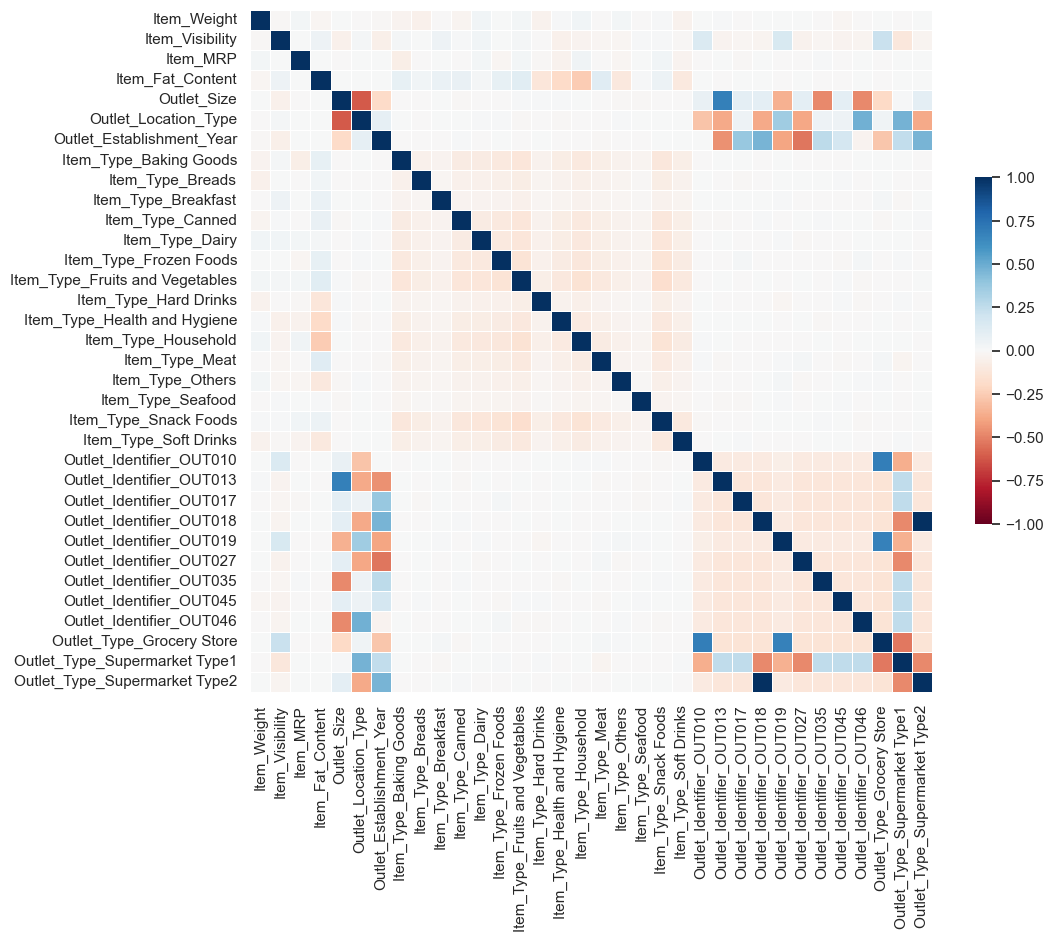

In [100]:
import seaborn as sns
corr = X.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [102]:
corr_features = correlation(X, 0.75)
corr_features

{'Outlet_Type_Supermarket Type2'}

In [103]:
X_new = X.drop(corr_features,axis=1)


In [104]:
X_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1
0,-0.808889,-1.096267,1.623670,0.0,0.5,1.0,0.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.738575,-0.968790,-1.595016,1.0,0.5,0.0,1.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.094638,-1.067205,0.081237,0.0,0.5,1.0,0.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.449766,-1.996676,0.689968,1.0,0.5,0.0,0.541667,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.905013,-1.996676,-1.476078,0.0,1.0,0.0,0.083333,0,0,0,...,1,0,0,0,0,0,0,0,0,1


<Axes: >

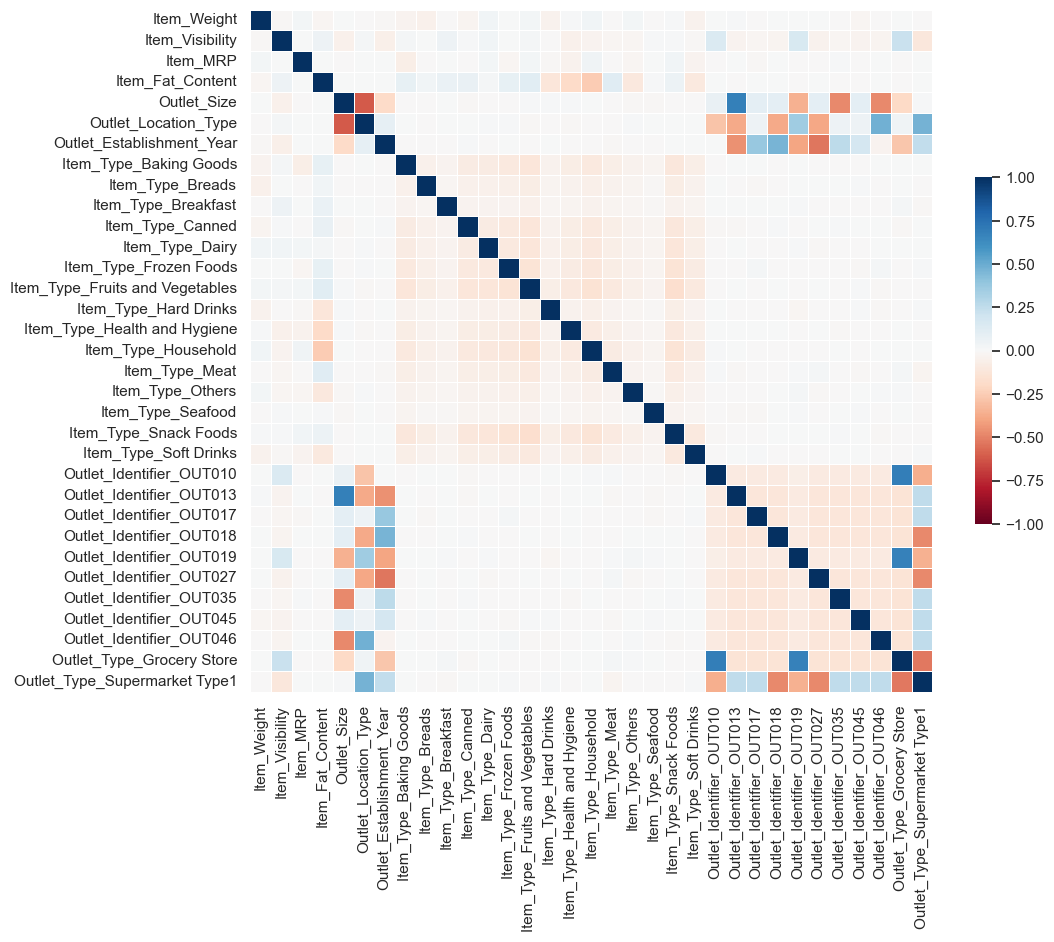

In [105]:
import seaborn as sns
corr = X_new.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [106]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_new, y_final)
mutual_info

array([6.96068959e-02, 8.10783704e-02, 9.27827735e-01, 2.24949824e-02,
       1.26508720e-02, 3.78150728e-02, 1.57629343e-01, 1.11927659e-02,
       4.60577412e-03, 0.00000000e+00, 3.23943840e-03, 1.80780714e-02,
       1.29913871e-02, 3.68464891e-03, 2.37530017e-03, 4.27263765e-04,
       5.30869035e-05, 0.00000000e+00, 0.00000000e+00, 5.05000353e-03,
       1.20776805e-02, 5.38112172e-03, 9.79340034e-02, 1.88661404e-03,
       2.34980506e-03, 7.33342925e-03, 9.40840498e-02, 4.88679257e-02,
       8.52567137e-03, 7.39975314e-03, 5.43889910e-03, 2.33132454e-01,
       8.62922724e-02])

In [107]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_new.columns
mutual_info.sort_values(ascending=False)

Item_MRP                           0.927828
Outlet_Type_Grocery Store          0.233132
Outlet_Establishment_Year          0.157629
Outlet_Identifier_OUT010           0.097934
Outlet_Identifier_OUT019           0.094084
Outlet_Type_Supermarket Type1      0.086292
Item_Visibility                    0.081078
Item_Weight                        0.069607
Outlet_Identifier_OUT027           0.048868
Outlet_Location_Type               0.037815
Item_Fat_Content                   0.022495
Item_Type_Dairy                    0.018078
Item_Type_Frozen Foods             0.012991
Outlet_Size                        0.012651
Item_Type_Snack Foods              0.012078
Item_Type_Baking Goods             0.011193
Outlet_Identifier_OUT035           0.008526
Outlet_Identifier_OUT045           0.007400
Outlet_Identifier_OUT018           0.007333
Outlet_Identifier_OUT046           0.005439
Item_Type_Soft Drinks              0.005381
Item_Type_Seafood                  0.005050
Item_Type_Breads                

<Axes: >

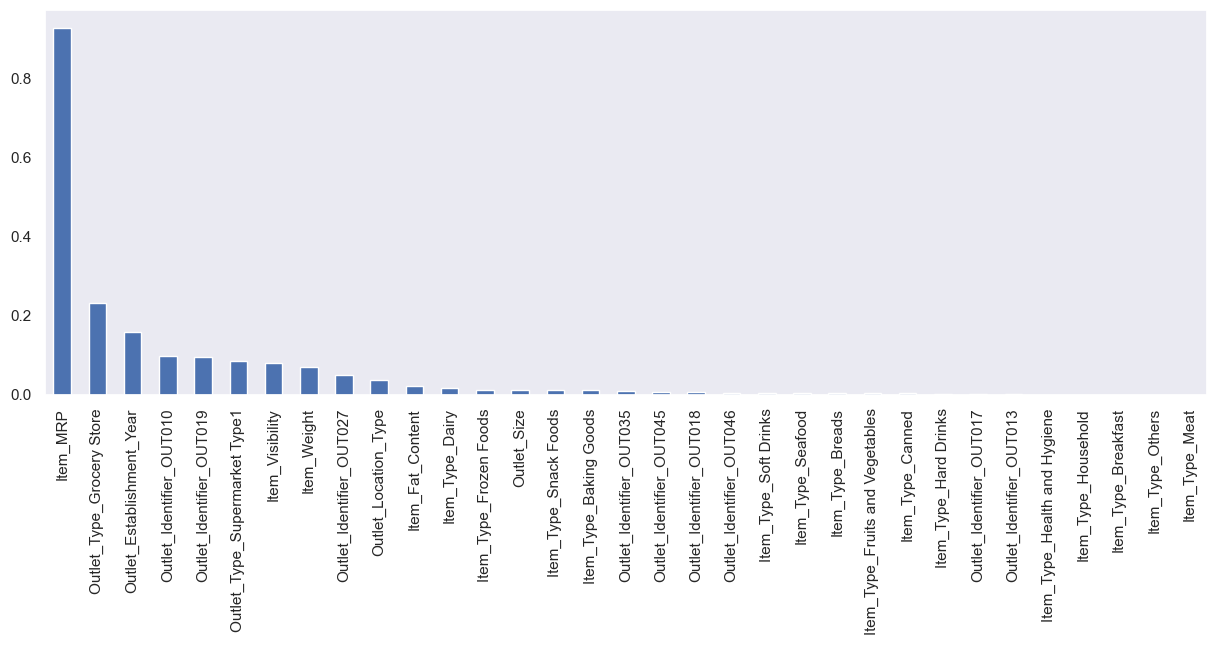

In [108]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [109]:
from sklearn.feature_selection import SelectPercentile


In [110]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_new, y_final)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000023C482A7D90>)

In [111]:
selected_top_columns.get_support()


array([False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True])

In [112]:
X_new.columns[selected_top_columns.get_support()]


Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT019',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1'],
      dtype='object')

In [113]:
len(X_new.columns[selected_top_columns.get_support()])

7

In [114]:
Final_X_new = X_new[['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT019',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1']]

In [115]:
Final_X_new

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Identifier_OUT010,Outlet_Identifier_OUT019,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1
0,-1.096267,1.623670,0.583333,0,0,0,1
1,-0.968790,-1.595016,1.000000,0,0,0,0
2,-1.067205,0.081237,0.583333,0,0,0,1
3,-1.996676,0.689968,0.541667,1,0,1,0
4,-1.996676,-1.476078,0.083333,0,0,0,1
...,...,...,...,...,...,...,...
8518,0.059306,1.148258,0.083333,0,0,0,1
8519,-0.157468,-0.463127,0.708333,0,0,0,1
8520,-0.457417,-0.867930,0.791667,0,0,0,1
8521,1.387998,-0.548996,1.000000,0,0,0,0


In [116]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit_transform(Final_X_new)

array([[-8.78151607e-01, -1.77519273e+00, -2.05810861e-01, ...,
         1.16330733e-01,  3.31360884e-03,  6.07802118e-15],
       [-1.16403350e+00,  1.43936595e+00,  4.13696100e-01, ...,
        -3.62447001e-01,  1.83468934e-01,  3.39577701e-16],
       [-1.07932250e+00, -2.45706905e-01, -2.17833409e-01, ...,
         1.15177402e-01,  2.78557846e-03,  1.34766274e-15],
       ...,
       [-6.30252883e-01,  7.80815157e-01, -3.65646999e-01, ...,
         1.17177606e-01,  8.11681608e-02,  6.45257848e-18],
       [ 1.29724220e+00,  7.50377335e-01,  9.20839886e-02, ...,
        -4.72411289e-01,  1.61476186e-01, -2.81142255e-18],
       [-4.03770726e-01,  9.96720936e-01, -3.19665271e-01, ...,
         6.31424840e-02, -3.91963645e-02,  2.12204743e-17]])

In [117]:
pd.DataFrame(pca.fit_transform(Final_X_new))

,0,1,2,3,4,5,6
0,-0.878152,-1.775193,-0.205811,-0.076048,0.116331,0.003314,6.078021e-15
1,-1.164033,1.439366,0.413696,0.623392,-0.362447,0.183469,3.395777e-16
2,-1.079322,-0.245707,-0.217833,-0.074371,0.115177,0.002786,1.347663e-15
3,-1.675580,-0.943501,1.365304,0.467381,0.747922,-0.437193,-2.822723e-15
4,-2.205589,1.161425,0.042951,-0.503603,0.085991,-0.190988,-2.380664e-15
...,...,...,...,...,...,...,...
8518,0.196361,-1.132352,-0.228745,-0.502147,-0.010161,-0.209891,2.348898e-17
8519,-0.274095,0.425048,-0.381859,0.035302,0.091030,0.044704,5.909616e-18
8520,-0.630253,0.780815,-0.365647,0.106606,0.117178,0.081168,6.452578e-18
8521,1.297242,0.750377,0.092084,0.627119,-0.472411,0.161476,-2.811423e-18


In [118]:
pca.explained_variance_ratio_

array([3.94182380e-01, 3.87813343e-01, 1.18280033e-01, 4.55623368e-02,
       3.38296568e-02, 2.03322503e-02, 2.58676119e-33])

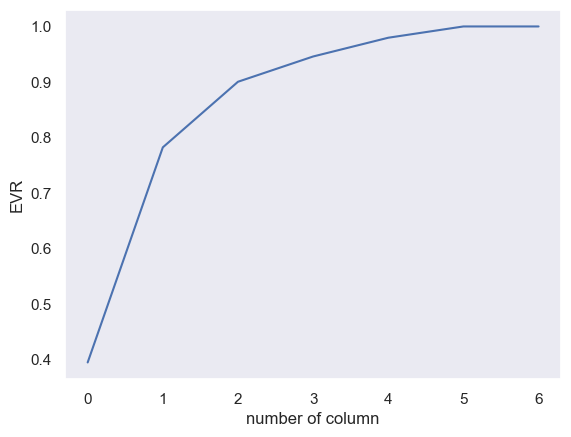

In [119]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of column')
plt.ylabel('EVR')
plt.show()

In [120]:
pca1 = PCA(n_components=4)

In [121]:
new_data = pca1.fit_transform(Final_X_new)

In [122]:
new_data

array([[-0.87815161, -1.77519273, -0.20581086, -0.07604791],
       [-1.1640335 ,  1.43936595,  0.4136961 ,  0.62339217],
       [-1.0793225 , -0.24570691, -0.21783341, -0.0743713 ],
       ...,
       [-0.63025288,  0.78081516, -0.365647  ,  0.1066062 ],
       [ 1.2972422 ,  0.75037734,  0.09208399,  0.6271186 ],
       [-0.40377073,  0.99672094, -0.31966527, -0.14292251]])

In [123]:
x_final = pd.DataFrame(new_data  , columns=['PC1' , 'PC2','PC3' , 'PC4'])

In [124]:
x_final

,PC1,PC2,PC3,PC4
0,-0.878152,-1.775193,-0.205811,-0.076048
1,-1.164033,1.439366,0.413696,0.623392
2,-1.079322,-0.245707,-0.217833,-0.074371
3,-1.675580,-0.943501,1.365304,0.467381
4,-2.205589,1.161425,0.042951,-0.503603
...,...,...,...,...
8518,0.196361,-1.132352,-0.228745,-0.502147
8519,-0.274095,0.425048,-0.381859,0.035302
8520,-0.630253,0.780815,-0.365647,0.106606
8521,1.297242,0.750377,0.092084,0.627119


In [125]:
y_final

0       0.985078
1      -1.218135
2       0.220360
3      -0.835183
4      -0.566616
          ...   
8518    0.573946
8519   -1.062855
8520   -0.393044
8521    0.070669
8522   -0.797934
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [126]:
X = pd.DataFrame(x_final)

In [127]:
X

,PC1,PC2,PC3,PC4
0,-0.878152,-1.775193,-0.205811,-0.076048
1,-1.164033,1.439366,0.413696,0.623392
2,-1.079322,-0.245707,-0.217833,-0.074371
3,-1.675580,-0.943501,1.365304,0.467381
4,-2.205589,1.161425,0.042951,-0.503603
...,...,...,...,...
8518,0.196361,-1.132352,-0.228745,-0.502147
8519,-0.274095,0.425048,-0.381859,0.035302
8520,-0.630253,0.780815,-0.365647,0.106606
8521,1.297242,0.750377,0.092084,0.627119


In [128]:
y = pd.DataFrame(y_final)

In [129]:
y

,Item_Outlet_Sales
0,0.985078
1,-1.218135
2,0.220360
3,-0.835183
4,-0.566616
...,...
8518,0.573946
8519,-1.062855
8520,-0.393044
8521,0.070669


## Model Training

In [130]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Preparing X and Y variables


In [131]:
X

,PC1,PC2,PC3,PC4
0,-0.878152,-1.775193,-0.205811,-0.076048
1,-1.164033,1.439366,0.413696,0.623392
2,-1.079322,-0.245707,-0.217833,-0.074371
3,-1.675580,-0.943501,1.365304,0.467381
4,-2.205589,1.161425,0.042951,-0.503603
...,...,...,...,...
8518,0.196361,-1.132352,-0.228745,-0.502147
8519,-0.274095,0.425048,-0.381859,0.035302
8520,-0.630253,0.780815,-0.365647,0.106606
8521,1.297242,0.750377,0.092084,0.627119


In [132]:
y

,Item_Outlet_Sales
0,0.985078
1,-1.218135
2,0.220360
3,-0.835183
4,-0.566616
...,...
8518,0.573946
8519,-1.062855
8520,-0.393044
8521,0.070669


In [133]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6818, 4), (1705, 4))

#### Create an Evaluate Function to give all metrics after model Training

In [134]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [135]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7305
- Mean Absolute Error: 0.5728
- R2 Score: 0.4671
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7181
- Mean Absolute Error: 0.5656
- R2 Score: 0.4786


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0007
- Mean Absolute Error: 0.8185
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9962
- Mean Absolute Error: 0.8158
- R2 Score: -0.0036


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.7305
- Mean Absolute Error: 0.5728
- R2 Score: 0.4671
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7181
- Mean Absolute Error: 0.5656
- R2 Score: 0.4786


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4961
- Mean Absolute Error: 0.3846
- R2 Score: 0.7543
----------------------

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7769
- Mean Absolute Error: 0.6028
- R2 Score: 0.3897


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2235
- Mean Absolute Error: 0.1723
- R2 Score: 0.9501
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5616
- Mean Absolute Error: 0.4371
- R2 Score: 0.6811


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.3810
- Mean Absolute Error: 0.2895
- R2 Score: 0.8551
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5595
- Mean Absolute Error: 0.4360
- R2 Score: 0.6834


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.4734
- Mean Absolute Error: 0.3704
- R2 Score: 0.7762
--

In [136]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error']}


In [137]:
from sklearn.model_selection import KFold

rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=KFold(n_splits=5),verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [138]:
rf_randomcv.best_params_


{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error'}

In [139]:
rf_randomcv


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [140]:
best_random_grid=rf_randomcv.best_estimator_


In [141]:
from sklearn.metrics import r2_score
y_pred=best_random_grid.predict(X_test)
print(r2_score(y_test,y_pred))
print("r2_score  {}".format(r2_score(y_test,y_pred)))


0.7112309789512484
r2_score  0.7112309789512484


In [142]:
rf_randomcv.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error'}

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['squared_error'], 'max_depth': [10], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1600, 1700, 1800, 1900, 2000]}


In [144]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


In [ ]:
best_grid = grid_search.best_params_

NameError: name 'grid_search' is not defined

In [ ]:
from sklearn.metrics import r2_score
y_pred=best_grid.predict(X_test)
print(r2_score(y_test,y_pred))
print("r2_score  {}".format(r2_score(y_test,y_pred)))


AttributeError: 'dict' object has no attribute 'predict'

In [ ]:
"""import optuna
from optuna import trial
import sklearn
from sklearn.model_selection import KFold

def objective(trial):
            
        max_depth  = trial.suggest_categorical('max_depth', [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
        criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'friedman_mse'])
        max_features = trial.suggest_categorical('max_features', ['sqrt','log2', None])
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10)
        min_samples_split = trial.suggest_int('min_samples_split', 3, 10)
        n_estimators = trial.suggest_int('n_estimators', 400, 500)

        clf = sklearn.ensemble.RandomForestRegressor(
            n_estimators=n_estimators, max_depth=max_depth,criterion =criterion, max_features = max_features, min_samples_leaf = min_samples_leaf, 
            min_samples_split=min_samples_split)
        
        return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv= KFold(10),scoring = 'neg_root_mean_squared_error').mean()
    
    

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))"""

'import optuna\nfrom optuna import trial\nimport sklearn\nfrom sklearn.model_selection import KFold\n\ndef objective(trial):\n            \n        max_depth  = trial.suggest_categorical(\'max_depth\', [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])\n        criterion = trial.suggest_categorical(\'criterion\', [\'squared_error\', \'absolute_error\', \'friedman_mse\'])\n        max_features = trial.suggest_categorical(\'max_features\', [\'sqrt\',\'log2\', None])\n        min_samples_leaf = trial.suggest_int(\'min_samples_leaf\', 3, 10)\n        min_samples_split = trial.suggest_int(\'min_samples_split\', 3, 10)\n        n_estimators = trial.suggest_int(\'n_estimators\', 400, 500)\n\n        clf = sklearn.ensemble.RandomForestRegressor(\n            n_estimators=n_estimators, max_depth=max_depth,criterion =criterion, max_features = max_features, min_samples_leaf = min_samples_leaf, \n            min_samples_split=min_samples_split)\n        \n        return sklearn.model_selection.cross_va

In [ ]:
study.best_params


NameError: name 'study' is not defined

In [ ]:
rf=RandomForestRegressor(n_estimators=10,max_depth=5,min_samples_split=5,min_samples_leaf=1,max_features=None,criterion='squared_error' )
rf.fit(X_train,y_train)

: 

In [ ]:
from sklearn import metrics

y_pred=rf.predict(X_test)
print(r2_score(y_test,y_pred)*100)


: 

In [ ]:
import numpy as np

value = 

rounded_value = np.around(value, 1)

print(rounded_value)

: 

In [ ]:
space = {'criterion': hp.choice('criterion', ['squared_error', 'absolute_error', 'friedman_mse']),
        'max_depth': hp.randint('max_depth', 10, 1200)+1,
        'max_features': hp.choice('max_features', ['sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }
space

: 

In [ ]:
"""def objective(space):
    model = RandomForestRegressor(criterion = space['criterion'], 
                                  max_depth = space['max_depth'],
                                  max_features = space['max_features'],
                                  min_samples_leaf = space['min_samples_leaf'],
                                  min_samples_split = space['min_samples_split'],
                                  n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }"""

: 

In [ ]:
"""from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best"""

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 